<a href="https://colab.research.google.com/github/Giocatory/ml_ai_learning/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)
(60000,)


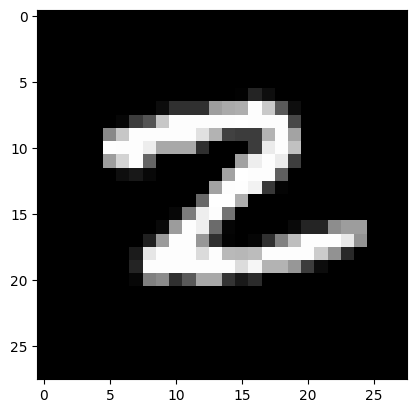

2


In [3]:
print(x_train_org.shape)
print(y_train_org.shape)

plt.imshow(x_train_org[143], cmap="gray")
plt.show()
print(y_train_org[143])

In [4]:
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
y_train = y_train_org.reshape(y_train_org.shape[0], -1)

x_test = x_test_org.reshape(x_test_org.shape[0], -1)
y_test = y_test_org.reshape(y_test_org.shape[0], -1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


In [5]:
x_train = x_train.astype('float32') / 255
y_train = y_train.astype('float32') / 255

x_test = x_test.astype('float32') / 255
y_test = y_test.astype('float32') / 255

In [6]:
CLASS_COUNT = 10

In [7]:
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

y_train.shape

(60000, 10)

In [8]:
model = Sequential()

model.add(Dense(1000, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(CLASS_COUNT, activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 16s 7ms/step - loss: 0.3221 - accuracy: 0.9013 - val_loss: 0.1311 - val_accuracy: 0.9600
Epoch 2/12
375/375 [==============================] - 2s 6ms/step - loss: 0.1481 - accuracy: 0.9553 - val_loss: 0.1077 - val_accuracy: 0.9690
Epoch 3/12
375/375 [==============================] - 2s 6ms/step - loss: 0.1169 - accuracy: 0.9636 - val_loss: 0.0969 - val_accuracy: 0.9710
Epoch 4/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0973 - accuracy: 0.9699 - val_loss: 0.0844 - val_accuracy: 0.9752
Epoch 5/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0835 - accuracy: 0.9737 - val_loss: 0.0856 - val_accuracy: 0.9743
Epoch 6/12
375/375 [==============================] - 2s 7ms/step - loss: 0.0795 - accuracy: 0.9743 - val_loss: 0.0928 - val_accuracy: 0.9742
Epoch 7/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0721 - accuracy: 0.9767 - val_loss: 0.0808 - val_accuracy: 0.9776
Epoch

In [10]:
print(history.history["loss"][-1])
print(history.history["val_loss"][-1])
print(history.history["accuracy"][-1])
print(history.history["val_accuracy"][-1])

0.0505577027797699
0.06784037500619888
0.9837916493415833
0.9826666712760925


In [11]:
loss, acc = model.evaluate(x_train, y_train)
print(loss)
print(acc)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0233 - accuracy: 0.9933
0.023283112794160843
0.9932500123977661


In [16]:
loss, acc = model.evaluate(x_test, y_test)
print(loss)
print(acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0624 - accuracy: 0.9814
0.0623541995882988
0.9814000129699707


6


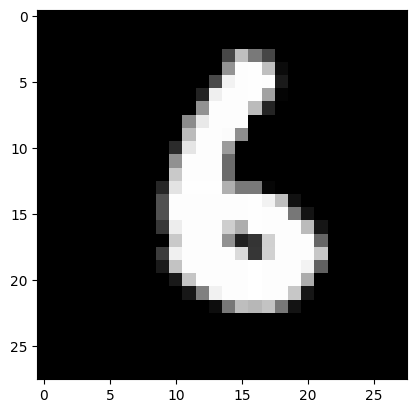

In [12]:
from random import randint


n = randint(1, 100)

plt.imshow(x_train_org[n], cmap="gray")
plt.show
print(y_train_org[n])

In [13]:
model.predict(x_train[:1])

1/1 [==============================] - 0s 243ms/step


array([[1.5437060e-08, 1.8367514e-07, 5.0859779e-07, 3.6699526e-04,
        1.3695238e-09, 9.9963129e-01, 6.9005108e-07, 1.4257082e-08,
        4.0594667e-08, 1.9059290e-07]], dtype=float32)

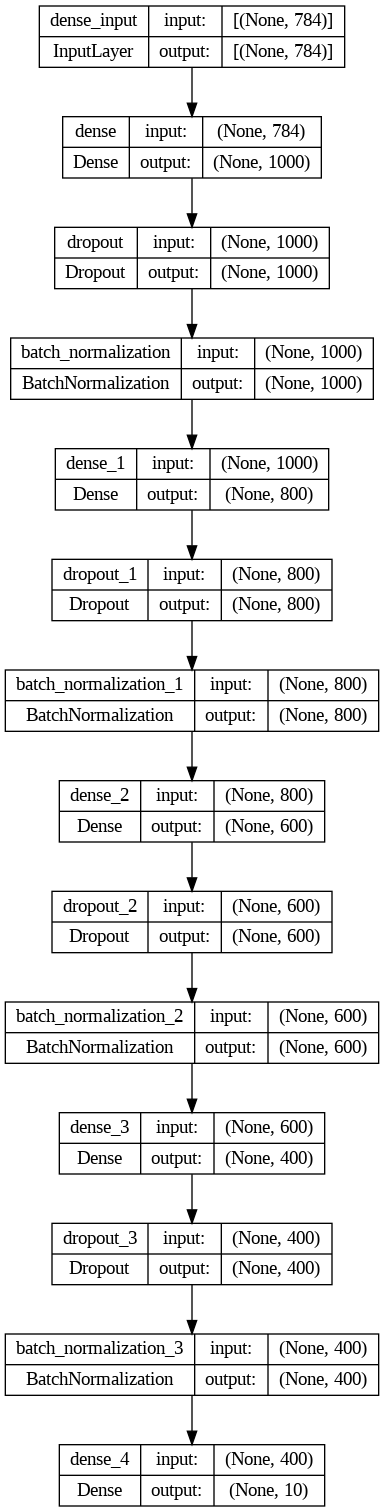

In [14]:
utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)